# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
import random
import json
from scipy.stats import linregress
from itertools import islice

from pandas.io.json import json_normalize    

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [239]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_id=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    #print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [240]:
cities

#converting list to strings
#my_list=[cities]
#my_string_list=[str(i) for i in my_list]
#my_string_list


['kodiak',
 'hithadhoo',
 'ancud',
 'nikolskoye',
 'praia',
 'kununurra',
 'gao',
 'maniwaki',
 'bethel',
 'ushuaia',
 'hermanus',
 'marcona',
 'port alfred',
 'le pradet',
 'uribia',
 'sinnamary',
 'belushya guba',
 'mouzouras',
 'avarua',
 'mataura',
 'bredasdorp',
 'dikson',
 'bambous virieux',
 'salalah',
 'rikitea',
 'karratha',
 'saryozek',
 'narnaund',
 'butaritari',
 'east london',
 'yellowknife',
 'rokytne',
 'tsihombe',
 'busselton',
 'moerai',
 'castro',
 'safaga',
 'yanan',
 'paamiut',
 'kapaa',
 'new norfolk',
 'punta arenas',
 'taolanaro',
 'sentyabrskiy',
 'katangli',
 'esperance',
 'hobart',
 'namibe',
 'colon',
 'vaini',
 'jiaocheng',
 'cabo san lucas',
 'mys shmidta',
 'taman',
 'crab hill',
 'port elizabeth',
 'lake havasu city',
 'grenaa',
 'barrow',
 'vysokogornyy',
 'cape town',
 'saint simons',
 'saint-augustin',
 'santiago del estero',
 'torbay',
 'yumen',
 'san patricio',
 'jacareacanga',
 'albany',
 'constitucion',
 'mahebourg',
 'saint-philippe',
 'kawana wat

In [241]:
#Building the URL

url="https://api.openweathermap.org/data/2.5/weather?"
units ="&units=metric"
query_url = f"{url}appid={api_key}&units={units}&q="


In [242]:
#Defining lists to store the api call results.
name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
wind=[]


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
   
    try:
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        #print(json.dumps(response, indent=4, sort_keys=True))
    except Exception:
         print("City not found. Skip....")
            
print(f"The City Name is: {name}")            
#print(f"The latitude information received is: {lat}")
#print(f"The longitude information received is: {lon}")
#print(f"The cloudiness information received is: {cloudiness}")
#print(f"The country information received is: {country}")
#print(f"The date information received is: {date}")
#print(f"The humidity information received is: {humidity}")
#print(f"The maximum temperature received is: {max_temp}")
#print(f"The wind speed received is: {wind}")

City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....
City not found. Skip....


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [243]:
#creating and printing a Dataframe
city_df=pd.DataFrame({"City":name,
                      "Cloudiness":cloudiness,
                      "Country":country,
                      "Date":date,
                      "Humidity":humidity,
                      "lat": lat,
                      "lng":lon,
                     "Max Temp":max_temp,
                     "Wind Speed":wind})
city_df

,City,Cloudiness,Country,Date,Humidity,lat,lng,Max Temp,Wind Speed
0,Saint Paul Harbor,90,US,1587868854,65,57.79,-152.41,281.15,3.10
1,Hithadhoo,93,MV,1587868910,70,-0.60,73.08,302.39,3.06
2,Ancud,75,CL,1587868910,100,-41.87,-73.82,285.93,3.60
3,Nikolskoye,99,RU,1587868864,80,59.70,30.79,274.15,3.00
4,Praia,40,CV,1587868911,73,14.92,-23.51,294.15,6.70
...,...,...,...,...,...,...,...,...,...
547,Iqaluit,40,CA,1587869162,85,63.75,-68.51,268.15,1.00
548,Chumikan,94,RU,1587869163,86,54.72,135.31,275.90,0.92
549,Nantucket,1,US,1587869163,93,41.28,-70.10,278.15,2.60
550,Belaya Gora,21,RU,1587869163,98,68.53,146.42,272.06,4.44


In [255]:
#exporting city data into csv
city_df.to_csv('out.csv', index=False)
          

In [256]:
#Obtaining the count of records in the Data Frame.
city_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
lat           552
lng           552
Max Temp      552
Wind Speed    552
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Noticeable Trends:
1) The temperature gradually increases as we appraoach the equator.
    2) Here we are trying to analyze the max temperature trends.

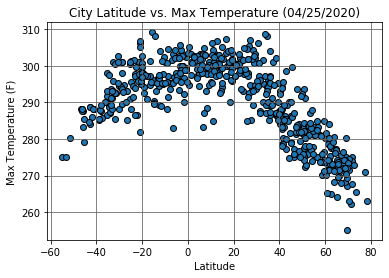

In [277]:
#Creating the Latitude vs. Max Temp Scatter Plot
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.scatter(lat, max_temp, marker="o",edgecolors="black")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("City Latitude vs. Max Temperature (04/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

#### Latitude vs. Humidity Plot

#### Noticeable Trends:
1) The humidity gradually increases as we appraoach the equator.
    2) Here we are trying to analyze the humidity levels across the cities.

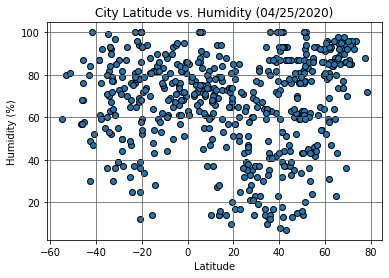

In [258]:
#Creating the Latitude vs. Humidity Sacatter Plot
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.scatter(lat, humidity, marker="o",edgecolors="black")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("City Latitude vs. Humidity (04/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

#### Noticeable Trends:
1) The cloudiness graph shows that 04/25/20 has been a cloudy day across the cities. The even spred of the scatter plots has lead to this assumption.

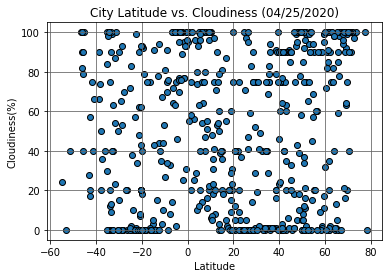

In [259]:
#Creating the Latitude vs. Cloudiness Sacatter Plot
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.scatter(lat, cloudiness, marker="o",edgecolors="black")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("City Latitude vs. Cloudiness (04/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

#### Latitude vs. Wind Speed Plot

#### Noticeable Trends:
1) We have had steady winds across all cities on 4/25/20, with very few otuliers ranging at 12mph.

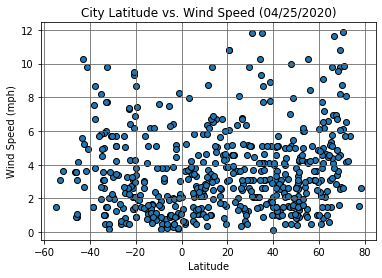

In [260]:
#Creating the Latitude vs. Wind Speed Sacatter Plot
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.scatter(lat, wind, marker="o",edgecolors="black")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("City Latitude vs. Wind Speed (04/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [261]:
# Creating Northern and Southern Hemisphere DataFrames
NH_df= city_df.loc[(city_df['lat']>0)]
#NH_df
SH_df= city_df.loc[(city_df['lat']<0)]
#SH_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.8695135100888413


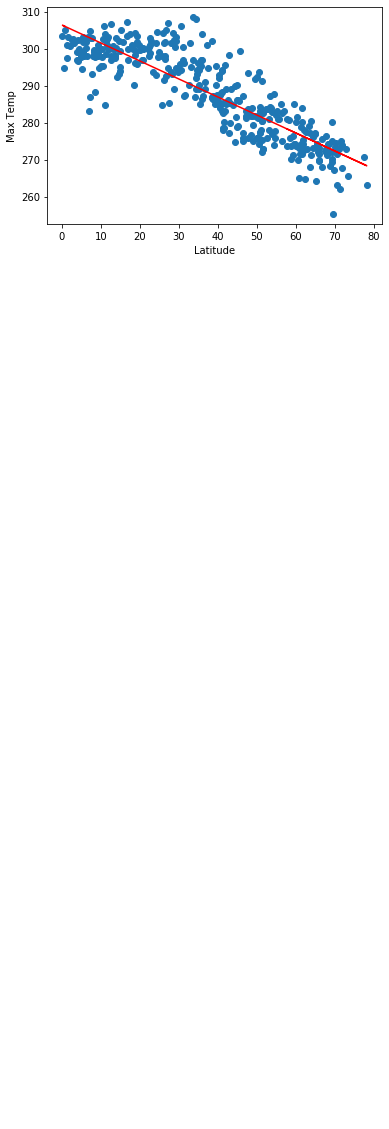

In [280]:
#Creating Linear Regression for Max Temp vs. Latitude for the Northern Hemisphere.
x_values = NH_df['lat']
y_values = NH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.6221019118574016


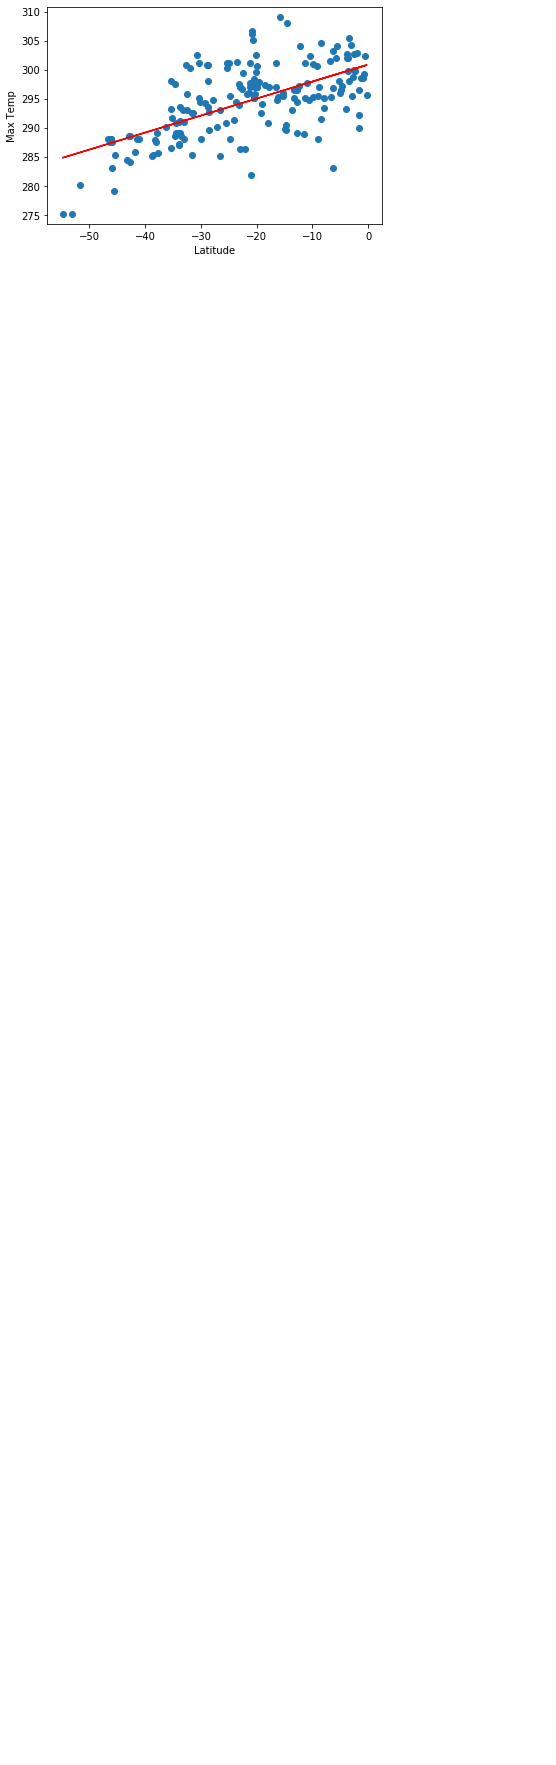

In [263]:
#Creating Linear Regression for Max Temp vs. Latitude for the Southern Hemisphere.
x_values = SH_df['lat']
y_values = SH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.20996405005554697


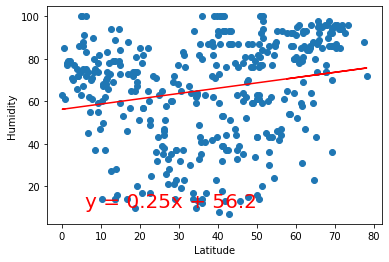

In [266]:
#Creating Linear Regression for Humidity vs. Latitude for the Northern Hemisphere.
x_values = NH_df['lat']
y_values = NH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.10998053928086507


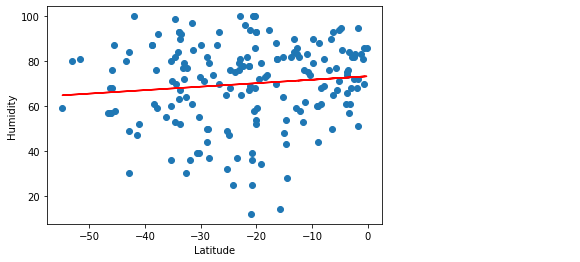

In [267]:
#Creating Linear Regression for Humidity vs. Latitude for the Southern Hemisphere.
x_values = SH_df['lat']
y_values = SH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14271350501230992


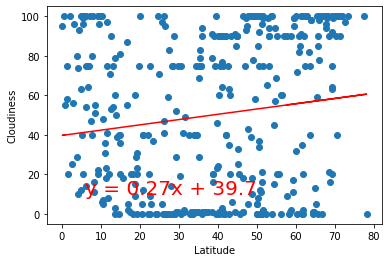

In [278]:
#Creating Linear Regression for Cloudiness vs. Latitude for the Northern Hemisphere.
x_values = SH_df['lat']
x_values = NH_df['lat']
y_values = NH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14624461236696745


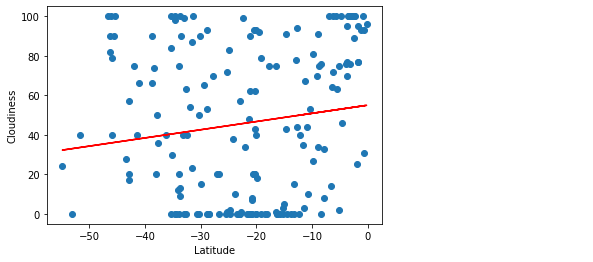

In [279]:
#Creating Linear Regression for Cloudiness vs. Latitude for the Southern Hemisphere.
x_values = SH_df['lat']
x_values = SH_df['lat']
y_values = SH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

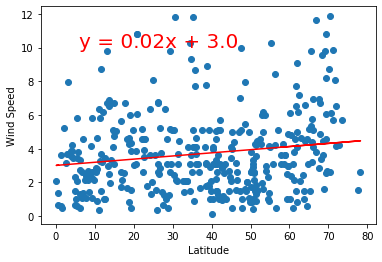

In [271]:
#Creating Linear Regression for Wind Speed vs. Latitude for the Northern Hemisphere.
x_values = NH_df['lat']
y_values = NH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
#print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.26281251429474894


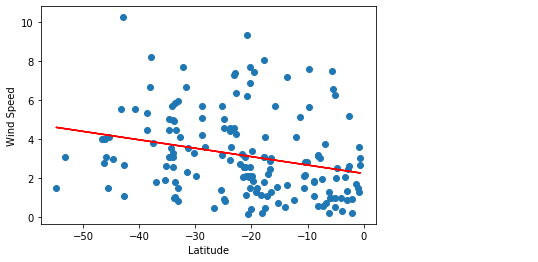

In [237]:
#Creating Linear Regression for Wind Speed vs. Latitude for the Northern Hemisphere.
x_values = SH_df['lat']
y_values = SH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
print(f'The r-squared is : {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()